<a href="https://colab.research.google.com/github/mariasald/avd-2024-01/blob/main/Atividade_Pr%C3%A1tica_4_O_Problema_do_Transiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Alunos**

* Gabriel César Tavares Ferreira - 21854868
* Maria Luiza Saldanha - 22153140

#**Bibliotecas Utilizadas**

In [26]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats
from scipy.special import factorial
from tabulate import tabulate

#**BibAD (1o Trabaho)**

In [27]:
def mediaAritmetica(nums):
    return round((sum(nums) / len(nums)), 3)

def var_amostral(nums):
  med = mediaAritmetica(nums)
  quad = np.sum(np.fromiter(((x - med) * (x - med) for x in nums), dtype=float))
  var = quad / len(nums)
  return round(var)

def desvio_padrao(nums):
  return round(math.sqrt(var_amostral(nums)))

def intervaloConfianca(nums, z):
    nivelConfianca = z / 100
    a = 1 - nivelConfianca
    z_a = 1 - (a / 2)
    distribuicao = scipy.stats.norm.ppf(z_a)
    erroPadrao = distribuicao * desvio_padrao(nums) / math.sqrt(len(nums))

    return [round((mediaAritmetica(nums) - erroPadrao), 3), round((mediaAritmetica(nums) + erroPadrao), 3)]

#**BibAD (3° Trabalho)**

In [28]:
def va_exponencial(media):
  u = random.random()
  x = -media * math.log (1 - u)
  return round(x,3)

def e_x(taxa_chegada, taxa_servico):
  rho = taxa_chegada / taxa_servico
  E_X = (rho / taxa_servico) / (1 - rho)
  return E_X

print(va_exponencial(1/9)) #nao esquecer de ver quando receber taxa e quando receber media!!!!!

def fila_mm1(taxa_chegada, taxa_servico, clientes_total):
    E_X = e_x(taxa_chegada, taxa_servico)

    tempos_chegada = np.cumsum([va_exponencial(1/taxa_chegada) for _ in range(clientes_total)])
    tempos_servico = [va_exponencial(1/taxa_servico) for _ in range(clientes_total)]

    tempos_espera = np.zeros(clientes_total)
    tempo_livre = 0

    for i in range(clientes_total):
        if tempos_chegada[i] > tempo_livre:
            tempos_espera[i] = 0
            tempo_livre = tempos_chegada[i] + tempos_servico[i]
        else:
            tempos_espera[i] = tempo_livre - tempos_chegada[i]
            tempo_livre += tempos_servico[i]

    X_n = np.mean(tempos_espera)
    confidencia = 0.95
    z = scipy.stats.norm.ppf(1 - (1 - confidencia) / 2)
    erro_padrao = np.std(tempos_espera, ddof=1) / np.sqrt(clientes_total)
    intervalo_confianca = (X_n - z * erro_padrao, X_n + z * erro_padrao)

    return round(X_n, 3)



0.297


#**Parte 1**

$\bar{X}(n)=\frac{\sum_{i=1}^n x_i}{n}$

* Estimar $\bar{X}(n)$, o tempo médio de espera em uma fila M/M/1 ($n=10^3,λ=9,μ=10$).
* Calcular o valor teórico: $E[X]=\rho \frac{1/\mu}{1-\rho}, \; onde \; \rho = \frac{\lambda}{\mu}$
* Computar o viés (bias): $B=\bar{X}(n)−E[X]$.
* Repetir a simulação r vezes (r=30).
* Anotar os resultados em uma tabela.
* Analisar os resultados.

In [29]:
resultados = fila_mm1(9, 10, 10**3)
print(resultados)

1.611


In [30]:
resultados1 = e_x(9, 10)
print(resultados1)

0.9000000000000001


In [31]:
bias = resultados-resultados1
print(bias)

0.7109999999999999


In [32]:
result_t = [["X", "B"]]
for i in range(30):
  aux = []
  result = fila_mm1(9, 10, 10**3)
  bias = result - e_x(9, 10)
  aux.append(result)
  aux.append(bias)
  result_t.append(aux)

tabela = tabulate(result_t, headers="firstrow", tablefmt="grid")
print(tabela)

+-------+--------+
|     X |      B |
+=======+========+
| 0.687 | -0.213 |
+-------+--------+
| 0.57  | -0.33  |
+-------+--------+
| 1.065 |  0.165 |
+-------+--------+
| 0.653 | -0.247 |
+-------+--------+
| 0.768 | -0.132 |
+-------+--------+
| 0.41  | -0.49  |
+-------+--------+
| 0.48  | -0.42  |
+-------+--------+
| 0.483 | -0.417 |
+-------+--------+
| 1.139 |  0.239 |
+-------+--------+
| 0.851 | -0.049 |
+-------+--------+
| 0.905 |  0.005 |
+-------+--------+
| 0.455 | -0.445 |
+-------+--------+
| 0.6   | -0.3   |
+-------+--------+
| 0.817 | -0.083 |
+-------+--------+
| 0.473 | -0.427 |
+-------+--------+
| 1.192 |  0.292 |
+-------+--------+
| 0.41  | -0.49  |
+-------+--------+
| 1.802 |  0.902 |
+-------+--------+
| 0.489 | -0.411 |
+-------+--------+
| 0.711 | -0.189 |
+-------+--------+
| 1.054 |  0.154 |
+-------+--------+
| 0.405 | -0.495 |
+-------+--------+
| 0.666 | -0.234 |
+-------+--------+
| 0.797 | -0.103 |
+-------+--------+
| 0.843 | -0.057 |
+-------+---

Análise

#**Parte 2**

* Simular o tempo médio de espera em uma fila M/M/1 (λ=9,μ=10).
* Eliminar o transiente usando as heurísticas de (a) Conway e (b) Fishman.
* Após eliminar o transiente, coletar n valores no estado estacionário ( n=103).
* Calcular $\bar{X}(n)$, o tempo médio de espera na fila e o viés (B).
* Repetir a simulação r vezes (r=30).
* Mostrar os resultados em uma tabela.
* Analisar os resultados.

##Heurística de Conway
Conway sugere descartar os primeiros 20% dos dados para eliminar o transiente.

##Heurística de Fishman
Fishman sugere descartar dados até que o sistema atinja um estado estacionário.


In [33]:
resultados = fila_mm1(9, 10, 10**3)
print(resultados)

1.937


In [34]:
resultadosTeorico = e_x(9, 10)
print(resultadosTeorico)

0.9000000000000001


In [35]:
bias = resultados-resultadosTeorico
print(bias)

1.037


In [36]:
def heuristica_conway(dados):
    return dados[int(0.2 * len(dados)):]

def heuristica_fishman(dados):
    tamanho_janela = 50
    for i in range(len(dados) - tamanho_janela):
        janela = dados[i:i+tamanho_janela]
        media_janela = np.mean(janela)
        if np.all(np.abs(janela - media_janela) < 0.01 * media_janela):
            return dados[i+tamanho_janela:]
    return dados

def fila_mm1_com_heuristicas(taxa_chegada, taxa_servico, clientes_total):
    E_X = e_x(taxa_chegada, taxa_servico)
    tempos_chegada = np.cumsum([va_exponencial(1/taxa_chegada) for _ in range(clientes_total)])
    tempos_servico = [va_exponencial(1/taxa_servico) for _ in range(clientes_total)]

    tempos_espera = np.zeros(clientes_total)
    tempo_livre = 0

    for i in range(clientes_total):
        if tempos_chegada[i] > tempo_livre:
            tempos_espera[i] = 0
            tempo_livre = tempos_chegada[i] + tempos_servico[i]
        else:
            tempos_espera[i] = tempo_livre - tempos_chegada[i]
            tempo_livre += tempos_servico[i]

    tempos_espera_conway = heuristica_conway(tempos_espera)
    tempos_espera_fishman = heuristica_fishman(tempos_espera)

    X_n_conway = np.mean(tempos_espera_conway)
    X_n_fishman = np.mean(tempos_espera_fishman)

    return round(X_n_conway, 3), round(X_n_fishman, 3)


In [37]:
taxa_chegada = 9
taxa_servico = 10
clientes_total = 10**3

E_X_teorico = e_x(taxa_chegada, taxa_servico)

resultados_conway = [["X_Conway", "B_Conway"]]
resultados_fishman = [["X_Fishman", "B_Fishman"]]
for i in range(30):
    resultado_conway, resultado_fishman = fila_mm1_com_heuristicas(taxa_chegada, taxa_servico, clientes_total)
    vies_conway = resultado_conway - E_X_teorico
    vies_fishman = resultado_fishman - E_X_teorico
    resultados_conway.append([resultado_conway, vies_conway])
    resultados_fishman.append([resultado_fishman, vies_fishman])

tabela_conway = tabulate(resultados_conway, headers="firstrow", tablefmt="grid")
tabela_fishman = tabulate(resultados_fishman, headers="firstrow", tablefmt="grid")

print("Tabela de Resultados - Conway")
print(tabela_conway)
print("\nTabela de Resultados - Fishman")
print(tabela_fishman)

Tabela de Resultados - Conway
+------------+------------+
|   X_Conway |   B_Conway |
+============+============+
|      0.886 |     -0.014 |
+------------+------------+
|      0.46  |     -0.44  |
+------------+------------+
|      0.552 |     -0.348 |
+------------+------------+
|      0.406 |     -0.494 |
+------------+------------+
|      0.506 |     -0.394 |
+------------+------------+
|      0.594 |     -0.306 |
+------------+------------+
|      1.637 |      0.737 |
+------------+------------+
|      0.897 |     -0.003 |
+------------+------------+
|      0.672 |     -0.228 |
+------------+------------+
|      0.835 |     -0.065 |
+------------+------------+
|      1.107 |      0.207 |
+------------+------------+
|      0.512 |     -0.388 |
+------------+------------+
|      0.514 |     -0.386 |
+------------+------------+
|      0.386 |     -0.514 |
+------------+------------+
|      0.367 |     -0.533 |
+------------+------------+
|      1.924 |      1.024 |
+------------+----

#**Parte 3**

* Executar uma simulação de horizonte infinito da fila M/M/1.
* Eliminar o transiente usando a heurística MSER-5Y.
* Estimar o tempo médio de espera na fila e o respectivo intervalo de confiança de 95%.
* A regra de parada é a precisão relativa de 5%.
* Cenário    I:  λ=7 clientes por segundo; μ=10 clientes por segundo.
* Cenário   II:  λ=8 clientes por segundo; μ=10 clientes por segundo.
* Cenário  III:  λ=9 clientes por segundo; μ=10 clientes por segundo.
* Cenário IV:  λ=9,5 clientes por segundo; μ=10 clientes por segundo.
* Plotar um gráfico comparativo dos quatro cenários.
* Plotar uma linha horizontal para o valor teórico esperado em cada cenário.
* Analisar os resultados.

## MYSER-5Y

É usada para eliminar transientes em simulações de horizonte infinito. A ideia é encontrar o ponto em que a média quadrática do erro é minimizada.

In [38]:
def fila_mm1_infinito(taxa_chegada, taxa_servico, num_clientes):
    tempos_chegada = np.cumsum([va_exponencial(1/taxa_chegada) for _ in range(num_clientes)])
    tempos_servico = [va_exponencial(1/taxa_servico) for _ in range(num_clientes)]

    tempos_espera = np.zeros(num_clientes)
    tempo_livre = 0

    for i in range(num_clientes):
        if tempos_chegada[i] > tempo_livre:
            tempos_espera[i] = 0
            tempo_livre = tempos_chegada[i] + tempos_servico[i]
        else:
            tempos_espera[i] = tempo_livre - tempos_chegada[i]
            tempo_livre += tempos_servico[i]

    return tempos_espera

In [39]:
def heuristica_mser_5y(tempos_espera, num_batches=5):
    batch_size = len(tempos_espera) // num_batches
    min_mse = float('inf')
    min_index = 0

    for i in range(batch_size, len(tempos_espera), batch_size):
        batch_means = [np.mean(tempos_espera[j:j+batch_size]) for j in range(0, i, batch_size)]
        mse = np.mean((batch_means - np.mean(batch_means))**2)
        if mse < min_mse:
            min_mse = mse
            min_index = i

    return tempos_espera[min_index:]


+----------+----------------+-----------------------+---------------+
|   Lambda |   Media_Espera |   Intervalo_Confianca |   E_X_Teorico |
+==========+================+=======================+===============+
|      7   |       0.253121 |            0.00746234 |      0.233333 |
+----------+----------------+-----------------------+---------------+
|      8   |       0.428192 |            0.0122585  |      0.4      |
+----------+----------------+-----------------------+---------------+
|      9   |       0.654754 |            0.0145232  |      0.9      |
+----------+----------------+-----------------------+---------------+
|      9.5 |       0.914934 |            0.0177786  |      1.9      |
+----------+----------------+-----------------------+---------------+


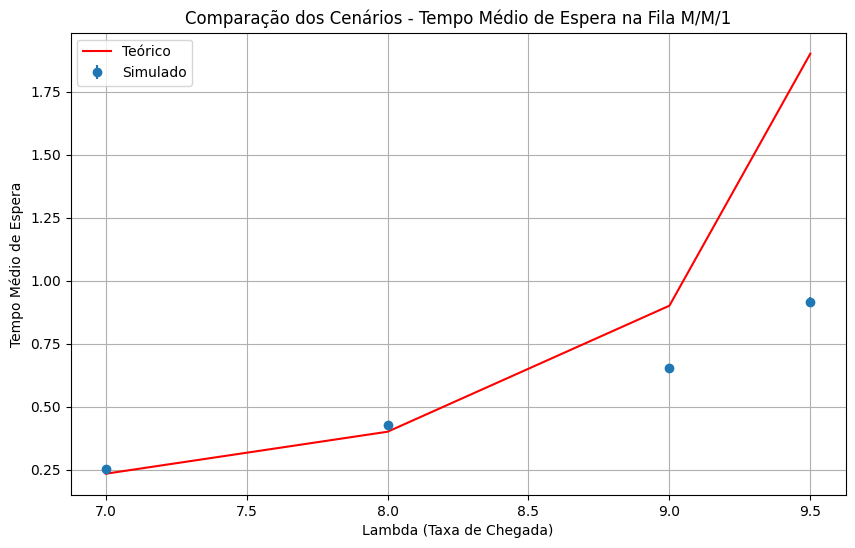

In [40]:
def simular_fila_mm1(taxa_chegada, taxa_servico, precisao_relativa=0.05, num_clientes_inicial=10000, incremento=5000):
    while True:
        tempos_espera = fila_mm1_infinito(taxa_chegada, taxa_servico, num_clientes_inicial)
        tempos_espera = heuristica_mser_5y(tempos_espera)
        media_espera = np.mean(tempos_espera)
        desvio_padrao = np.std(tempos_espera, ddof=1)
        erro_padrao = desvio_padrao / math.sqrt(len(tempos_espera))
        intervalo_confianca = 1.96 * erro_padrao

        precisao_atual = intervalo_confianca / media_espera
        if precisao_atual <= precisao_relativa:
            return media_espera, intervalo_confianca
        else:
            num_clientes_inicial += incremento

cenarios = [(7, 10), (8, 10), (9, 10), (9.5, 10)]
resultados = []

for lambda_chegada, mu_servico in cenarios:
    media_espera, intervalo_confianca = simular_fila_mm1(lambda_chegada, mu_servico)
    e_x_teorico = e_x(lambda_chegada, mu_servico)
    resultados.append((lambda_chegada, media_espera, intervalo_confianca, e_x_teorico))

tabela_resultados = [["Lambda", "Media_Espera", "Intervalo_Confianca", "E_X_Teorico"]]
for resultado in resultados:
    tabela_resultados.append(list(resultado))

tabela = tabulate(tabela_resultados, headers="firstrow", tablefmt="grid")
print(tabela)

lambdas = [resultado[0] for resultado in resultados]
medias_espera = [resultado[1] for resultado in resultados]
intervalos_confianca = [resultado[2] for resultado in resultados]
valores_teoricos = [resultado[3] for resultado in resultados]

plt.figure(figsize=(10, 6))
plt.errorbar(lambdas, medias_espera, yerr=intervalos_confianca, fmt='o', label='Simulado')
plt.plot(lambdas, valores_teoricos, 'r-', label='Teórico')
plt.xlabel('Lambda (Taxa de Chegada)')
plt.ylabel('Tempo Médio de Espera')
plt.title('Comparação dos Cenários - Tempo Médio de Espera na Fila M/M/1')
plt.legend()
plt.grid(True)
plt.show()